In [2]:
import numpy as np 
import pandas as pd 

## 1.1 Data source
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

### Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

## 1.2 Data definitions
id: listing ID  
name: name of the listing  
host_id: host ID  
host_name: name of the host  
neighbourhood_group: location  
neighbourhood: area  
latitude: latitude coordinates  
longitude: longitude coordinates  
room_type: listing space type  
price: price in dollars  
minimum_nights: amount of nights minimum  
number_of_reviews: number of reviews  
last_review: latest review  
reviews_per_month: number of reviews per month  
calculated_host_listings_count : amount of listing per host  
availability_365: number of days when listing is available for booking  

# 2. Data frame

In [3]:
df=pd.read_csv("/Users/tramduong/Desktop/Python/ML4B/AB_NYC_2019.csv")

Let's take a look at the dataframe info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Data normalization 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/wm/p8nb38xx6kj3t8lkxdcj64qw0000gn/T/ipykernel_94187/3719915308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],kde = False)


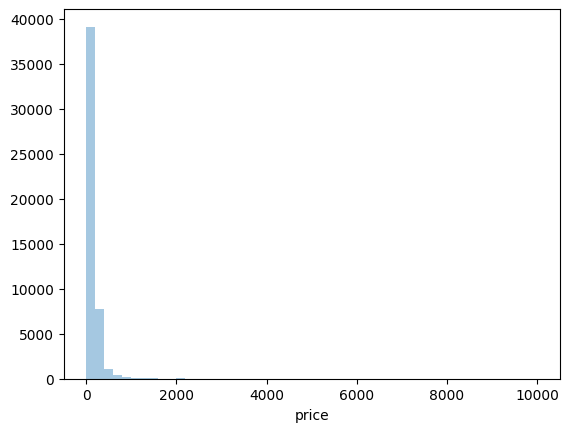

In [7]:
#Histogram of the prices 
sns.distplot(df['price'],kde = False)
plt.show()

Add \\$1 to the price in the dataframe and then apply logarthmic function. 
This does not modify the nature of price dataset too much as log(1) = 0.

In [8]:
#adding a small constant to the price column to prevent log(0) issue and assign a new column
df['log_price'] = np.log(df['price']+1)

/var/folders/wm/p8nb38xx6kj3t8lkxdcj64qw0000gn/T/ipykernel_94187/3238204845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_price'],kde = False)


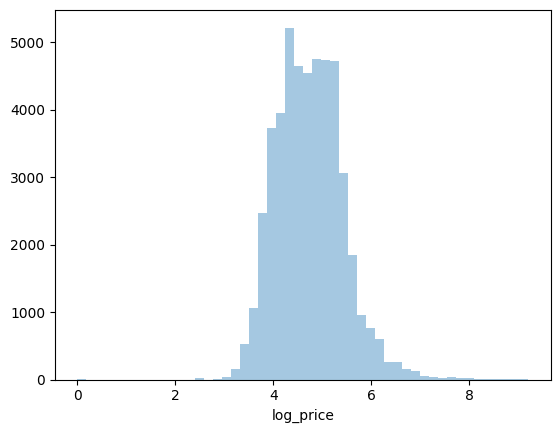

In [9]:
sns.distplot(df['log_price'],kde = False)
plt.show()

In [10]:
#first making the df['name'] series lower-case. Then, apply 'str.split' to split each sentence in each row by whitespace.
#After that drop any NaN values in the series and then covert the series to a list.

split_name=df['name'].str.lower().str.split().dropna()
split_name_list=split_name.tolist()

In [11]:
#see the first 10 elements in the list
split_name_list[:10]

[['clean', '&', 'quiet', 'apt', 'home', 'by', 'the', 'park'],
 ['skylit', 'midtown', 'castle'],
 ['the', 'village', 'of', 'harlem....new', 'york', '!'],
 ['cozy', 'entire', 'floor', 'of', 'brownstone'],
 ['entire', 'apt:', 'spacious', 'studio/loft', 'by', 'central', 'park'],
 ['large', 'cozy', '1', 'br', 'apartment', 'in', 'midtown', 'east'],
 ['blissartsspace!'],
 ['large', 'furnished', 'room', 'near', "b'way"],
 ['cozy', 'clean', 'guest', 'room', '-', 'family', 'apt'],
 ['cute', '&', 'cozy', 'lower', 'east', 'side', '1', 'bdrm']]

In [12]:
flatten_name_list = [val for sublist in split_name_list for val in sublist]

In [13]:
#show the first 10 elements in the flattened list
#flatten_name_list[:10]

In [14]:
#need to first download the stopwords using the follwoing link: nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download()
import nltk
nltk.download('stopwords')
#showing info http://nltk.github.com/nltk_data/ 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tramduong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))
stop_words 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
filtered_sentence = [w for w in flatten_name_list if not w in stop_words]

In [17]:
#showing the first 10 elements of the filtered element.
filtered_sentence[0:10]

['clean',
 '&',
 'quiet',
 'apt',
 'home',
 'park',
 'skylit',
 'midtown',
 'castle',
 'village']

{'room': 9389, 'bedroom': 7231, 'private': 6985, 'apartment': 6113, 'cozy': 4634, 'studio': 3772, 'brooklyn': 3629, 'apt': 3571, 'spacious': 3387, '1': 3357}


<BarContainer object of 10 artists>

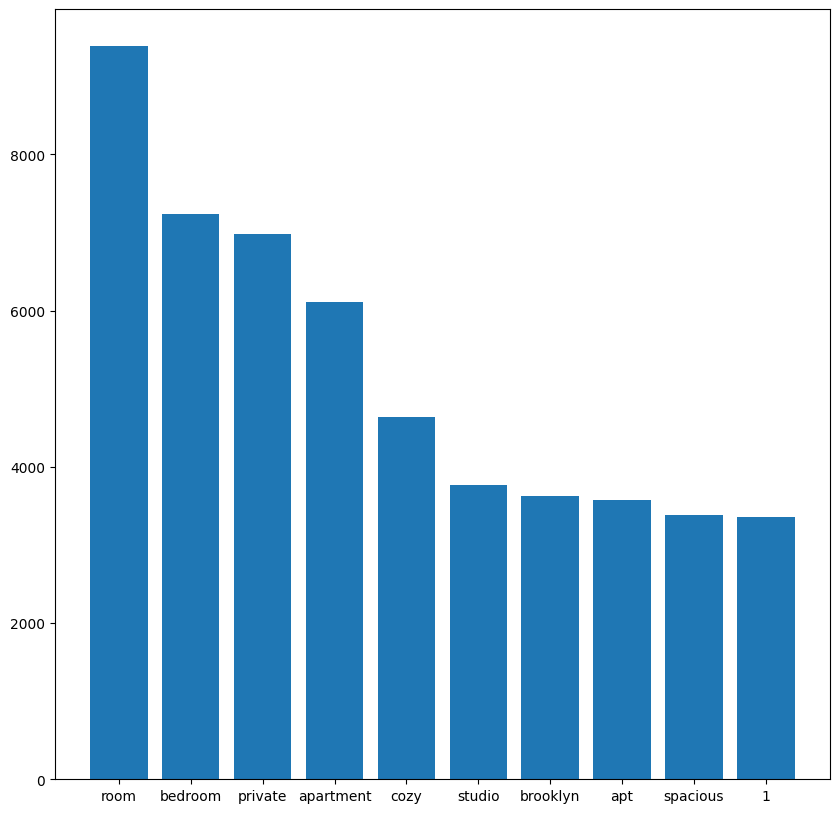

In [18]:
#Count the frequency of each word in the filtered_sentence list
#import counter from collections package
from collections import Counter
c = Counter(filtered_sentence)
most_common_word=c.most_common(10)
print(dict(most_common_word))
plt.figure(figsize=(10,10))
plt.bar(dict(most_common_word).keys(), dict(most_common_word).values())

# 3. Feature engineering

In [19]:
#getting rid of unncessary columns from dataframe
df=df.drop(["price","id","host_id","last_review","host_name","name" ],axis=1)

In [20]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,4.394449


In [21]:
#separating labels and predictors
X=df.drop('log_price',axis=1)
y=df['log_price'].values

#splitting train (75%) and test set (25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
X_train.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
542,Brooklyn,Bedford-Stuyvesant,40.68497,-73.95592,Entire home/apt,3,207,2.18,1,304
18954,Queens,Edgemere,40.59324,-73.77288,Private room,30,1,0.04,43,354
3852,Brooklyn,Crown Heights,40.67026,-73.92587,Entire home/apt,2,17,0.39,1,0
34822,Manhattan,Washington Heights,40.85268,-73.92716,Entire home/apt,1,42,4.00,1,2
41630,Bronx,Kingsbridge,40.88474,-73.90321,Private room,30,0,NaN,37,0


In [23]:
#Selecting numerical dataframe in train set
X_train_num=X_train.select_dtypes(include=np.number)

#Selecting categorical dataframe in train set
X_train_cat=df.select_dtypes(exclude=['number'])

In [24]:
X_train_num.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
X_train_num.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
542,40.68497,-73.95592,3,207,2.18,1,304
18954,40.59324,-73.77288,30,1,0.04,43,354
3852,40.67026,-73.92587,2,17,0.39,1,0
34822,40.85268,-73.92716,1,42,4.00,1,2
41630,40.88474,-73.90321,30,0,NaN,37,0


In [26]:
X_train_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [27]:
#SimpleImputer to fill in missing values
from sklearn.impute import SimpleImputer
#Pipeline to define a sequence of data processing steps that are applied in order.
from sklearn.pipeline import Pipeline
#MinMaxScaler to scale numerical features to a specific range, often between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

#creating a pipeline for numerical attribute. Pipeline: median imputer + MinMaxScaler
#SimpleImputer imputer: Strategy Median fill any missing values with the median value of the corresponding feature
#MinMaxScaler mm_sccaler: feature scaling using the minimum and maximum values of the ceacg feature => transformed data lie within the range 
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('mm_scaler',MinMaxScaler()),])

In [28]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#applying label encoding for categorical features in train set
X_train_cat=X_train_cat.apply(LabelEncoder().fit_transform)


In [29]:
X_train_cat.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [30]:
X_train_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0


In [31]:
#importing ColumnTransformer and OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#separating numerical and categorical attributes in the train set
num_attribs = list (X_train_num)
cat_attribs = list (X_train_cat)

#creating a full pipeline: numerical + categorical
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",OneHotEncoder(handle_unknown='ignore'),cat_attribs)])

#fit and transform the train set using the full pipeline
X_train_prepd = full_pipeline.fit_transform(X_train)

In [32]:
X_train_prepd

<36671x234 sparse matrix of type '<class 'numpy.float64'>'
	with 312364 stored elements in Compressed Sparse Row format>

# 4. Modeling

## 4.1 Linear regression

Let's first try linear regression

In [33]:
#importing linear regression model and mean_squared_error metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#definiing linear regressor
lin_reg=LinearRegression()

#feeding in X_train and y_train for model fitting
lin_reg.fit(X_train_prepd,y_train)

#making predictions on train set
lin_predictions = lin_reg.predict(X_train_prepd)

print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(lin_predictions)

#getting MSE and RMSE values
lin_mse=mean_squared_error(y_train,lin_predictions)
lin_rmse=np.sqrt(lin_mse)

print("Mean squared error: %.3f" % lin_mse)
print("Root mean squared error: %.3f" % lin_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.95122901 4.14799038 4.72440314 ... 5.39970909 5.27389019 5.00299724]
Mean squared error: 0.225
Root mean squared error: 0.475


This is not super bad given that our log_price mean was ~\\$5.

In [34]:
#importing cross_val_score to perform k-fold validation
from sklearn.model_selection import cross_val_score

#performing 10-fold validation
scores=cross_val_score(lin_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
lin_rmse_scores=np.sqrt(-scores)
print("Scores:", lin_rmse_scores)
print("Mean: %.3f" % lin_rmse_scores.mean())
print("STD: %.3f" % lin_rmse_scores.std())

Scores: [0.47830871 0.45564725 0.48854221 0.48343166 0.46318884 0.47012686
 0.47627059 0.48807739 0.50977132 0.46878607]
Mean: 0.478
STD: 0.015


The mean RMSE in the validation set is about the same as training set, which means we are not overly overfitting. 

Let's plot the predictions against the actual labels in the training set.

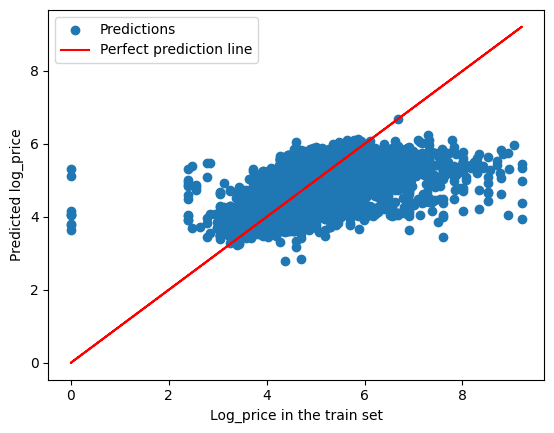

In [35]:
plt.scatter(y_train,lin_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')

plt.xlabel("Log_price in the train set")
plt.ylabel("Predicted log_price")
plt.legend()

## 4.2 Decision Tree Regression

In [36]:
#importing decision tree model
from sklearn.tree import DecisionTreeRegressor

#defining decision tree regressor
tree_reg=DecisionTreeRegressor()
#feeding X_train and y_train into the regressor
tree_reg.fit(X_train_prepd,y_train)

#making predictions on train set
tree_predictions = tree_reg.predict(X_train_prepd)
print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(tree_predictions)

#getting MSE and RMSE values
tree_mse=mean_squared_error(y_train,tree_predictions)
tree_rmse=np.sqrt(tree_mse)

print("Mean squared error: %.3f" % tree_mse)
print("Root mean squared error: %.3f" % tree_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Mean squared error: 0.000
Root mean squared error: 0.001


=> Overfitting

In [37]:
#performing 10-fold validation
scores=cross_val_score(tree_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
tree_rmse_scores=np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean: %.3f" % tree_rmse_scores.mean())
print("STD: %.3f" %  tree_rmse_scores.std())

Scores: [0.5968588  0.61175929 0.62892127 0.64822884 0.62368248 0.61611467
 0.59851861 0.63551323 0.63761382 0.60569855]
Mean: 0.620
STD: 0.017


In [38]:
#adding max_depth of 15 limitation
tree_reg=DecisionTreeRegressor(max_depth=15)
#fitting the train set
tree_reg.fit(X_train_prepd,y_train)

#making predictions
tree_predictions = tree_reg.predict(X_train_prepd)
print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(tree_predictions)

#getting MSE and RMSE values
tree_mse=mean_squared_error(y_train,tree_predictions)
tree_rmse=np.sqrt(tree_mse)

print("Mean squared error: %.3f" % tree_mse)
print("Root mean squared error: %.3f" % tree_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.94296475 3.71357207 4.65363955 ... 5.10918155 5.21375323 4.97429734]
Mean squared error: 0.098
Root mean squared error: 0.312


In [39]:
#performing 10-fold validation
scores=cross_val_score(tree_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=10)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
tree_rmse_scores=np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean: %.3f" % tree_rmse_scores.mean())
print("STD: %.3f" %  tree_rmse_scores.std())

Scores: [0.52825459 0.53389791 0.53905971 0.55402338 0.53655434 0.52931633
 0.52588919 0.53776007 0.55896567 0.53178789]
Mean: 0.538
STD: 0.010


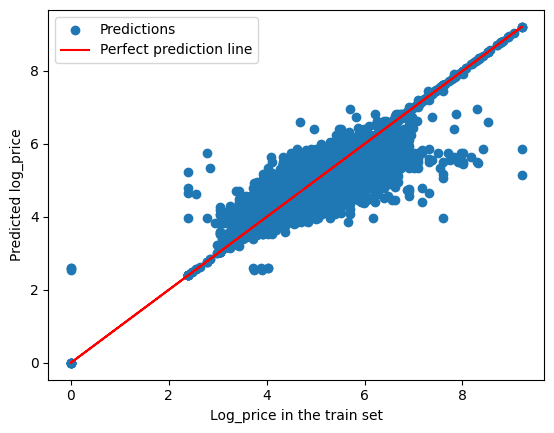

In [40]:
plt.scatter(y_train,tree_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.xlabel("Log_price in the train set")
plt.ylabel("Predicted log_price")
plt.legend()

## 4.3 Random Forest regression

In [41]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

#choose 30 number of trees
forest_reg=RandomForestRegressor( random_state = 42)

#fitting the training set
forest_reg.fit(X_train_prepd,y_train)

#making predictions
forest_predictions=forest_reg.predict(X_train_prepd)
print("Log_price from Data Set:" )
print(y_train)
print("Log_price from Prediction: ")
print(forest_predictions)

#getting MSE and RMSE values
forest_mse=mean_squared_error(y_train,forest_predictions)
forest_rmse=np.sqrt(forest_mse)

print("Mean squared error: %.3f" % forest_mse)
print("Root mean squared error: %.3f" % forest_rmse)

Log_price from Data Set:
[4.60517019 3.71357207 4.39444915 ... 4.87519732 5.01727984 4.79579055]
Log_price from Prediction: 
[4.70930247 3.71573791 4.50607405 ... 4.91937052 5.05148129 4.88941065]
Mean squared error: 0.028
Root mean squared error: 0.167


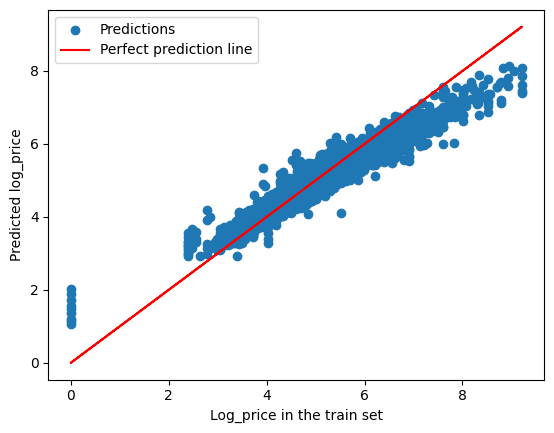

In [42]:
plt.scatter(y_train,forest_predictions, label='Predictions')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.xlabel("Log_price in the train set")
plt.ylabel("Predicted log_price")
plt.legend()

In [43]:
#performing 5fold validation
scores=cross_val_score(forest_reg, X_train_prepd, y_train, scoring = "neg_mean_squared_error",cv=5)

# skleanr's cross validation expect a utility function, so the greater the better. 
# That is why putting a negative sign
forest_rmse_scores=np.sqrt(-scores)
print("Scores:", forest_rmse_scores)
print("Mean: %.3f" % forest_rmse_scores.mean())
print("STD: %.3f" % forest_rmse_scores.std())

Scores: [0.43878649 0.45710397 0.43514845 0.45293813 0.46357475]
Mean: 0.450
STD: 0.011


In [44]:
#to show the pair of tuples in feature_importances
for feature in zip(X_train.columns, forest_reg.feature_importances_):
    print(feature)

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, forest_reg.feature_importances_):
    feats[feature] = importance #add the name/value pair 

('neighbourhood_group', 0.13354288841975134)
('neighbourhood', 0.14199478916502659)
('latitude', 0.05186384341963328)
('longitude', 0.04686531713966493)
('room_type', 0.0499750431175872)
('minimum_nights', 0.030535033817760744)
('number_of_reviews', 0.07419246612034067)
('reviews_per_month', 0.0002670710207708434)
('calculated_host_listings_count', 0.0006665330869407948)
('availability_365', 0.029530403343463046)


<Axes: >

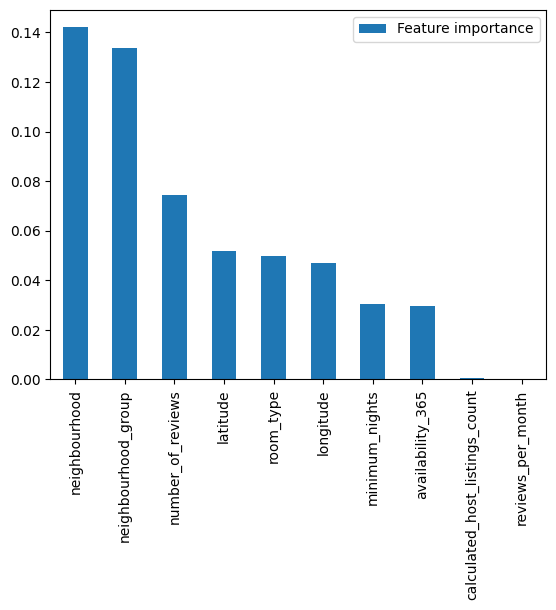

In [45]:
#creating a dataframe from 'feats' dict. Setting dict keys as an index and renaming name of the importance value column
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature importance'})
#sort the importance value by an descending order and create a bar plot
importances.sort_values(by='Feature importance',ascending=False).plot(kind='bar')

### 4.3.1 Evaluate on the test set

Let's transform the test set. One thing to be careful is that we should NOT fit_transform the test set because the whole point of ML is to train the model so that it can make good predictions on test set. We don't want the model to cheat by optimizing the model to the test set.

In [46]:
#Do NOT fit the test data. Only transform using the pipeline
X_test_prepd=full_pipeline.transform(X_test)

In [47]:
#Making predictions using random forest model trained above
final_predictions = forest_reg.predict(X_test_prepd)
print("Log_price from Data Set:" )
print(y_test)
print("Log_price from Prediction: ")
print(final_predictions)
#getting mse and rmse values
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

print("Mean squared error: %.3f" % final_mse)
print("Root mean squared error: %.3f" % final_rmse)

Log_price from Data Set:
[4.49980967 3.4339872  4.79579055 ... 5.01727984 3.71357207 5.30330491]
Log_price from Prediction: 
[4.85444745 3.84777488 4.5560672  ... 4.54925662 4.47240501 5.27599847]
Mean squared error: 0.189
Root mean squared error: 0.434


In [48]:
X_test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,3,62,0.71,1,189
44383,Queens,Ridgewood,40.70666,-73.90779,Private room,21,0,NaN,1,73
15394,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,2,17,0.43,1,0
43230,Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,2,5,1.88,327,272
16332,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,2,30,0.80,1,30


In [49]:
groups = X_test['neighbourhood_group']
groups = np.unique(X_test['neighbourhood_group'])
print(groups)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


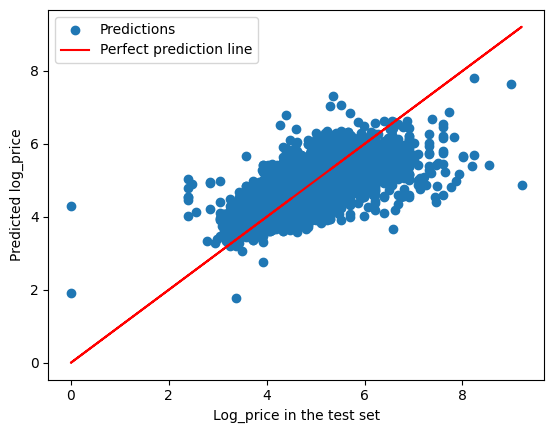

In [50]:
#groups = np.unique(X_test['neighbourhood_group'])
plt.scatter(y_test,final_predictions, label='Predictions')
"""
for g in groups:
    plt.scatter(y_test,final_predictions, label=g)
    #ix = np.where(group == g)
    #ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)

groups = X_test.groupby('neighbourhood_group')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)
    plt.scatter(y_test,final_predictions, label=name)
"""
plt.plot(y_test,y_test,'r',label='Perfect prediction line')    
plt.xlabel("Log_price in the test set")
plt.ylabel("Predicted log_price")
plt.legend()

In [51]:
#making predictions on the test set using the Decision tree model with pruning
final_predictions_tree = tree_reg.predict(X_test_prepd)
print("Log_price from Data Set:" )
print(y_test)
print("Log_price from Prediction: ")
print(final_predictions_tree)
#getting mse and rmse values
final_mse_tree = mean_squared_error(y_test,final_predictions_tree)
final_rmse_tree = np.sqrt(final_mse_tree)

print("Mean squared error: %.3f" % final_mse_tree)
print("Root mean squared error: %.3f" % final_rmse_tree)

Log_price from Data Set:
[4.49980967 3.4339872  4.79579055 ... 5.01727984 3.71357207 5.30330491]
Log_price from Prediction: 
[4.83185649 3.76269307 4.72845474 ... 4.33124688 4.41909592 4.76184251]
Mean squared error: 0.271
Root mean squared error: 0.521


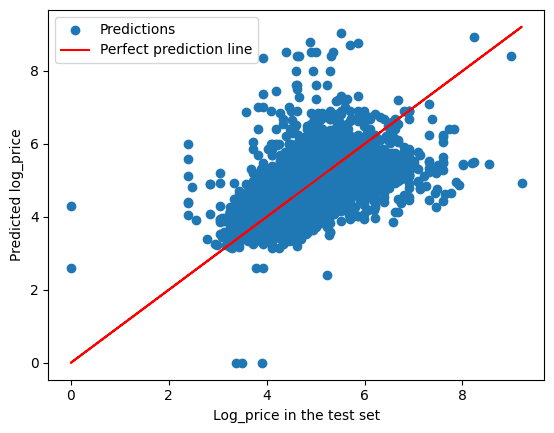

In [52]:
plt.scatter(y_test,final_predictions_tree, label='Predictions')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.xlabel("Log_price in the test set")
plt.ylabel("Predicted log_price")
plt.legend()

# 5. Conclusion

In conclusion, the random forest model was better than liner regression and decision tree model in terms of predicting on both train and test sets. Decision tree model without pruining definitely overfitted too much. However even the random forest model could not make outstanding predictions across all datasets mainly because (1) the data was highly skewed so that we don't have enough low and high price AirBnB data and (2) hyperparameter tuning was not performed. At least visualization showed us that the neighbourhood was a importnat factor in setting a price. Other models such as support vector machine or neural networks could be worth trying. Hope you enjoyed my project.